In [98]:
#Upload the .txt or .csv format of the Twitter scrapes for Mozdeh
import csv
import numpy as np
import scipy.io 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


dataframe_raw = pd.read_csv('raw data/TwitterSearches_Tweets_AllFiltered.txt', sep='\t', lineterminator='\n')

dataframe_sent = pd.read_csv('raw data/sentiment.txt', sep='\t', lineterminator='\n')


In [2]:
dataframe_raw.head() #Just a short view of what we are working with

,Label,EntryID,Published,Tweet(Title),Content(Blank),Geo,Source,AuthorName,AuthorURL,Language,Retweets,Timezone,FavoriteCount,UserFollowersCount,UserStatusesCount
0,neo%20nazi,897607181528321920,Tue Aug 15 23:53:23 +0000 2017,RT @VanJones68: Neo Nazi's themselves could no...,RT @VanJones68: Neo Nazi's themselves could no...,null,"<a href=""http://twitter.com/download/iphone"" r...",Didi,rubylilyd,en,1815,null,3964,62,2871.0
1,neo%20nazi,897607180186247040,Tue Aug 15 23:53:23 +0000 2017,RT @TheOnion: Trump Blasts Critics Who Judge N...,RT @TheOnion: Trump Blasts Critics Who Judge N...,null,"<a href=""https://mobile.twitter.com"" rel=""nofo...",❄️JDC❄️,Jonathan_Cordy,en,1371,Eastern Time (US & Canada),13957,56,1488.0
2,neo%20nazi,897607168081317888,Tue Aug 15 23:53:20 +0000 2017,RT @jajgyk: After finally speaking out against...,RT @jajgyk: After finally speaking out against...,null,"<a href=""http://twitter.com/download/android"" ...",Jim Smith,JimSmit95891630,en,1,null,11949,380,2373.0
3,neo%20nazi,897607155561451520,Tue Aug 15 23:53:17 +0000 2017,RT @SpikeReeds: There's Klan members &amp; Neo...,RT @SpikeReeds: There's Klan members &amp; Neo...,null,"<a href=""http://twitter.com/download/iphone"" r...",a l i s h a ✨,lishabaaaby,en,7,null,7435,523,12314.0
4,neo%20nazi,897607140478726144,Tue Aug 15 23:53:13 +0000 2017,RT @SheriffClarke: Lib media hijacks a neo naz...,RT @SheriffClarke: Lib media hijacks a neo naz...,null,"<a href=""http://twitter.com/download/android"" ...",America 1st Jinksy,JinksyLin,en,4392,null,15142,10682,9161.0


In [3]:
numTweets = dataframe_raw.groupby('AuthorURL').size().to_frame().reset_index() #Getting number of posts by each author
                                                                                #and resetting name from index to colummn
numTweets.columns #What are our column names?

Index(['AuthorURL', 0], dtype='object')

In [4]:
numTweets.columns = ['AuthorURL', 'NumTweets'] #Renaming columns
numTweets.sort_values(by='NumTweets', ascending=False, inplace=True) #Sorting authors by number of posts
numTweets.reset_index(drop=True, inplace=True) #Resetting index to reflect sorted state
numTweets.head()

,AuthorURL,NumTweets
0,nazi_taheri7477,146
1,en,76
2,genlady9,65
3,Nazi_kw,55
4,MichaelOleson,49


In [5]:
top_poster = numTweets.iloc[0]['AuthorURL'] #Top poster
top_poster

'nazi_taheri7477'

In [6]:
dataframe_sent.columns = ['Item', 'PosEmo', 'NegEmo'] #Renaming columns because they were a little wonky

In [7]:
assert(len(dataframe_sent) == len(dataframe_raw)) #Making sure they are the same size. will throw error if not
df_raw_plus_sent = pd.concat([dataframe_sent, dataframe_raw], axis=1) #Assumes sentiment and raw are correcctly aligned

In [8]:
df_top_poster = df_raw_plus_sent[df_raw_plus_sent['AuthorURL'] == top_poster] #Posts by top poster
df_top_poster.head() 

,Item,PosEmo,NegEmo,Label,EntryID,Published,Tweet(Title),Content(Blank),Geo,Source,AuthorName,AuthorURL,Language,Retweets,Timezone,FavoriteCount,UserFollowersCount,UserStatusesCount
69963,69964,1,1,nazi,897687300079050752,Wed Aug 16 05:11:45 +0000 2017,RT @HalehBanoo: همسر نازنین زاغری: امیدوارم به...,RT @HalehBanoo: همسر نازنین زاغری: امیدوارم به...,null,"<a href=""http://twitter.com/download/android"" ...",Nazi,nazi_taheri7477,fa,3,null,2873,1508,9990.0
69964,69965,1,1,nazi,897687294752239616,Wed Aug 16 05:11:43 +0000 2017,RT @Mandee_Lavan: همسر نازنین زاغری: امیدوارم ...,RT @Mandee_Lavan: همسر نازنین زاغری: امیدوارم ...,null,"<a href=""http://twitter.com/download/android"" ...",Nazi,nazi_taheri7477,fa,2,null,2873,1508,9990.0
70037,70038,3,2,nazi,897687423618043904,Wed Aug 16 05:12:14 +0000 2017,"RT @HerryRodin: Dear #HumanRights defenders, P...","RT @HerryRodin: Dear #HumanRights defenders, P...",null,"<a href=""http://twitter.com/download/android"" ...",Nazi,nazi_taheri7477,en,2,null,2873,1508,9991.0
70370,70371,2,2,nazi,897688074083332096,Wed Aug 16 05:14:49 +0000 2017,#Twitter Storm Join us on today in support of...,#Twitter Storm Join us on today in support of...,null,"<a href=""http://twitter.com/download/android"" ...",Nazi,nazi_taheri7477,en,0,null,2873,1508,9992.0
70872,70873,1,3,nazi,897689111129182208,Wed Aug 16 05:18:57 +0000 2017,RT @Mandee_Lavan: It has been over 6 months si...,RT @Mandee_Lavan: It has been over 6 months si...,null,"<a href=""http://twitter.com/download/android"" ...",Nazi,nazi_taheri7477,en,6,null,2873,1509,9993.0


In [9]:
df_top_poster.index = pd.to_datetime(df_top_poster['Published'])

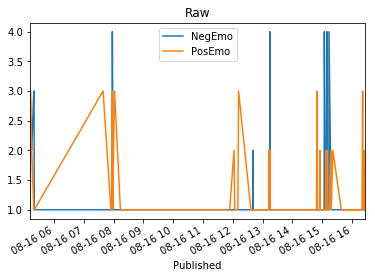

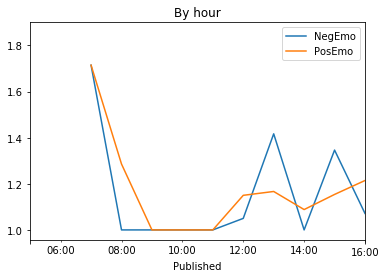

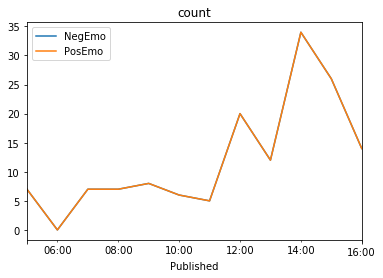

In [166]:
df_top_poster[['NegEmo', 'PosEmo']].plot(title='Raw')
df_top_poster[['NegEmo', 'PosEmo']].resample('H').mean().plot(title='By hour') #Can resample time series to get hourly averages
df_top_poster[['NegEmo', 'PosEmo']].resample('H').apply(len).plot(title='count') #Can resample time series to get hourly averages

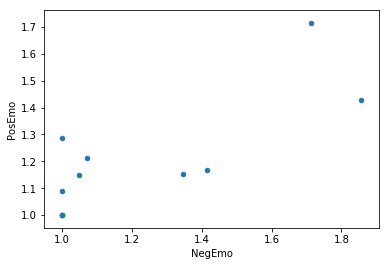

In [29]:
df_top_poster[['NegEmo', 'PosEmo']].resample('H').mean().plot.scatter('NegEmo', 'PosEmo')

In [30]:
df_top_poster[['NegEmo', 'PosEmo']].resample('H').mean().corr()

,NegEmo,PosEmo
NegEmo,1.000000,0.782502
PosEmo,0.782502,1.000000


## Average time series for all users

In [13]:
df_raw_plus_sent.index = pd.to_datetime(df_raw_plus_sent['Published'])

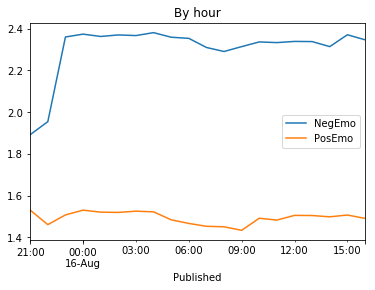

In [167]:
df_raw_plus_sent[['NegEmo', 'PosEmo']].resample('H').mean().plot(title='By hour')

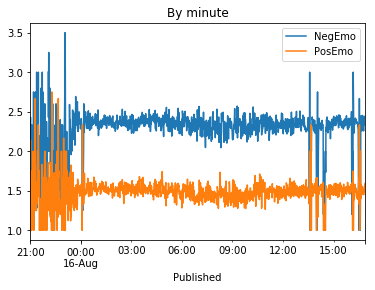

In [168]:
df_raw_plus_sent[['NegEmo', 'PosEmo']].resample('min').mean().plot(title='By minute')

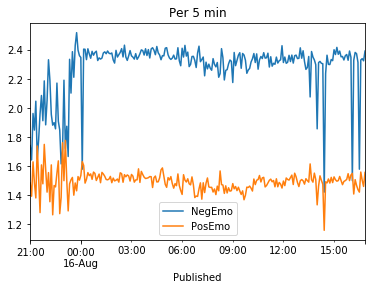

In [169]:
df_raw_plus_sent[['NegEmo', 'PosEmo']].resample('5min').mean().plot(title='Per 5 min')

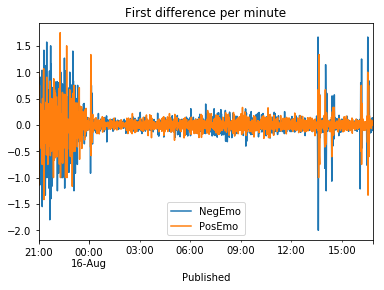

In [170]:
#First Difference
df_raw_plus_sent[['NegEmo', 'PosEmo']].resample('1min').mean().diff().plot(title = 'First difference per minute')

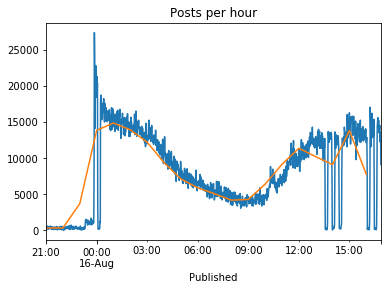

In [178]:
#Frequency of posts
(df_raw_plus_sent['Item'].resample('1min').apply(len)*60).plot(title = 'Posts per hour') #Samples per minute
df_raw_plus_sent['Item'].resample('H').apply(len).plot(title = 'Posts per hour') #Samples per hour (smoothed)